## Import Libraries

In [1]:
#import libraries

import numpy as np
import pandas as pd
import itertools
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, Masking, Embedding

## Load Data

In [9]:
#load data

#input
input_data = pd.read_csv('/Users/Madi/Desktop/ML/inputdata_randomized5time.csv')

#organize by year
data1979 = input_data.loc[input_data['year']==1979];data1980 = input_data.loc[input_data['year']==1980];data1981 = input_data.loc[input_data['year']==1981];data1984 = input_data.loc[input_data['year']==1984];data1985 = input_data.loc[input_data['year']==1985];data1986 = input_data.loc[input_data['year']==1986]
data1987 = input_data.loc[input_data['year']==1987];data1988 = input_data.loc[input_data['year']==1988];data1989 = input_data.loc[input_data['year'] == 1989];data1990 = input_data.loc[input_data['year'] == 1990];data1992 = input_data.loc[input_data['year']==1992]
data1993 = input_data.loc[input_data['year']==1993];data1998 = input_data.loc[input_data['year'] == 1998]
data1997 = input_data.loc[input_data['year'] == 1997];data1999 = input_data.loc[input_data['year'] == 1999]; data2000 = input_data.loc[input_data['year'] == 2000]
data2001 = input_data.loc[input_data['year'] == 2001]; data2002 = input_data.loc[input_data['year'] == 2002]
data2003 = input_data.loc[input_data['year'] == 2003]; data2004 = input_data.loc[input_data['year'] == 2004]
data2005 = input_data.loc[input_data['year'] == 2005];data2006 = input_data.loc[input_data['year'] == 2006]
data2007 = input_data.loc[input_data['year'] == 2007];data2008 = input_data.loc[input_data['year'] == 2008]
data2009 = input_data.loc[input_data['year'] == 2009];data2010 = input_data.loc[input_data['year'] == 2010]
data2011 = input_data.loc[input_data['year'] == 2011];data2012 = input_data.loc[input_data['year'] == 2012]
data2013 = input_data.loc[input_data['year'] == 2013];data2014 = input_data.loc[input_data['year'] == 2014]
data2015 = input_data.loc[input_data['year'] == 2015];data2016 = input_data.loc[input_data['year'] == 2016]
data2016 = input_data.loc[input_data['year'] == 2016];data2017 = input_data.loc[input_data['year'] == 2017]
data2018 = input_data.loc[input_data['year'] == 2018];data2019 = input_data.loc[input_data['year'] == 2019]
data2020 = input_data.loc[input_data['year'] == 2020]


a = ['site','airT','precip','snowDepth','SWE','streamFlow']

data1979= data1979[a].copy();data1980= data1980[a].copy();data1981= data1981[a].copy();data1984= data1984[a].copy();data1985= data1985[a].copy();data1987= data1987[a].copy();data1986= data1986[a].copy();data1988 = data1988[a].copy();data1989 = data1989[a].copy();data1990 = data1990[a].copy() ; data1992 = data1992[a].copy();data1993 = data1993[a].copy();data1998 = data1998[a].copy() 
data1997 = data1997[a].copy();data1999 = data1999[a].copy();data2000 = data2000[a].copy();data2001 = data2001[a].copy();data2002 = data2002[a].copy()
data2007 = data2007[a].copy();data2008 = data2008[a].copy();data2009 = data2009[a].copy()
data2010 = data2010[a].copy();data2011 = data2011[a].copy();data2012 = data2012[a].copy()
data2013 = data2013[a].copy();data2014 = data2014[a].copy();data2015 = data2015[a].copy()
data2016 = data2016[a].copy();data2017 = data2017[a].copy();data2018 = data2018[a].copy()
data2019 = data2019[a].copy();data2020 = data2020[a].copy()

input_data.head()

,year,site,latitude,longitude,month,airT,precip,snowDepth,SWE,streamFlow
0,1979,Brown Duck,40.58102,-110.58587,1,-18,4.0,42,7.8,19.9
1,1979,Brown Duck,40.58102,-110.58587,2,-5,3.8,53,11.8,20.0
2,1979,Brown Duck,40.58102,-110.58587,3,7,3.9,58,15.6,19.4
3,1979,Brown Duck,40.58102,-110.58587,4,-6,1.0,65,19.5,29.1
4,1979,Brown Duck,40.58102,-110.58587,5,14,2.0,71,20.5,253.5


In [10]:
#output
output_data = pd.read_csv('/Users/Madi/Desktop/ML/cleandroughtdata1.csv')
out = ["D2Area"]
output_labels = output_data[out].copy()
output_data.head()


,Year,D2Area,Unnamed: 2,Unnamed: 3,Unnamed: 4,arizona area,california,colorado area,area nevada,new mexico,utah,wyoming,total
0,1979,0.004874,NaN,NaN,NaN,113998.0,163696.000000,104185.0,110567.0,121697.000000,84899.0,97914.0,796956.0
1,1980,0.061005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1981,0.017254,NaN,NaN,NaN,1985.0,0.230748,NaN,1979.0,0.004874,NaN,NaN,NaN
3,1984,0.045597,NaN,NaN,NaN,1986.0,0.001083,NaN,1980.0,0.061005,NaN,NaN,NaN
4,1985,0.231000,NaN,NaN,NaN,1987.0,0.027079,NaN,1981.0,0.017254,NaN,NaN,NaN


## Organize data manually into batches

In [11]:

alldata = [data1979,data1980,data1981,data1984,data1985,data1986,data1987,data1988,data1989,data1990,data1992,data1993,data1997,data1998,data1999,data2000,data2001,data2002,data2003,data2004,data2005,data2006,data2007,data2008,data2009,data2010,data2011,data2012,data2013,data2014,data2015,data2016,data2017,data2018,data2019,data2020]


#for x in range(len(alldata)):
 #   print(len(alldata[x])/5)
 
    

features = 5
batch_size = 1
timestep = 5
count = 0
batch = []
tempbatch = []
tempyear = []
fullbatch = []
tracker = 0
totalcount = 0


for x in range(len(alldata)): 
    tempyear = alldata[tracker]
    batch = []
    index=0
    for y in range((int(tempyear.shape[0]/timestep))):
        if len(batch) < batch_size:
            tempbatch = []
            if y == (int(tempyear.shape[0]/timestep)-1):
                for z in range(timestep):
                    tempbatch.append(tempyear.iloc[index])
                    index +=1
                batch.append(tempbatch)
                totalcount +=1
                fullbatch.append(batch)
            else:
                for z in range(timestep):
                    tempbatch.append(tempyear.iloc[index])
                    index +=1
                batch.append(tempbatch)
                totalcount +=1

        elif len(batch) == batch_size:
            fullbatch.append(batch)
            batch = []
            tempbatch = []
            for z in range(timestep):
                tempbatch.append(tempyear.iloc[index])
                if index == (tempyear.shape[0]-1):
                    batch.append(tempbatch)
                    fullbatch.append(batch)
                    batch = []
                index +=1
   
            batch.append(tempbatch)
            
    tracker +=1


In [12]:

pad = [[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0]]

#add padding
for x in range(len(fullbatch)):
    single = fullbatch[x]
    for m in range(len(single)):
        if len(single) != batch_size:
            difference = batch_size - len(single)
            while difference != 0:
                for k in range(difference):
                    single.insert(0,pad)
                    difference = batch_size - len(single)
         


#convert data back into dataframe
newbatch = []
for x in range(len(fullbatch)):
    single = fullbatch[x]
    for c in range(len(single)):
        individual = single[c]
        for d in range(len(individual)):
            one = individual[d]
            one = pd.DataFrame(one)
            one = pd.DataFrame.transpose(one)

                   
#pop any unnecessary variables
for x in range(len(fullbatch)):
    single = fullbatch[x]
    for c in range(len(single)):
        individual = single[c]
        for d in range(len(individual)):
            one = individual[d]
            if isinstance(one,list) == False:
                one = one.tolist()
                one.pop(0)
                if len(one) != features:
                    while len(one) != features:
                        one.pop(0)
                newbatch.append(one)
            else:
                newbatch.append(one)
                

#put info back into a dataframe
paddedfinal = pd.DataFrame(newbatch,columns=['airT','precip','snowDepth','SWE','streamFlow'])
#print(paddedfinal)



In [13]:
# reorganize data so each batch of sites per timestep is a single vector
temp = []
batches = []
index = 0
paddedfarray = paddedfinal.values.tolist()

padded_flatten = list(itertools.chain(*paddedfarray))


for y in range(int(len(paddedfarray)/batch_size/timestep)):
    for x in range(timestep*batch_size):
        temp.append(paddedfarray[index])
        index +=1
    batches.append(temp)
    temp = []


batch = []
combined = []


for y in range(len(batches)):
    index = 0
    count = 0
    batch = batches[y]
    for z in range(int(len(batch)/batch_size)):
        for x in range(batch_size):
            temp.append(batch[index])
            index +=timestep
        combined.append(temp)
        temp = []
        count+=1
        index = count
        
for x in range(len(combined)):
    combined[x] = list(itertools.chain(*combined[x]))
  
#print(len(combined))

In [14]:
z= features*batch_size

reshapedcombined = np.reshape(combined,(int(len(combined)/timestep),timestep,z))
print(len(reshapedcombined))
X_train, X_test, y_train, y_test = train_test_split(reshapedcombined, output_labels, test_size=0.30, random_state=117)


1127


## Normalize Data

In [15]:
#standardize data

x_mean = X_train.mean(axis=0)
x_std = X_train.std(axis=0)
X_train = (X_train - x_mean) / x_std # (train_data - min) / (max-min) 
X_test = (X_test - x_mean) / x_std



In [16]:
print(X_train.shape,'\n',y_train.shape)


(788, 5, 5) 
 (788, 1)


## Build the Model

Epoch 1/1000
19/19 - 5s - loss: 0.1277 - mae: 0.2769 - val_loss: 0.0728 - val_mae: 0.2090

.Epoch 2/1000
19/19 - 0s - loss: 0.0806 - mae: 0.2300 - val_loss: 0.0661 - val_mae: 0.2097
.Epoch 3/1000
19/19 - 0s - loss: 0.0730 - mae: 0.2225 - val_loss: 0.0628 - val_mae: 0.2057
.Epoch 4/1000
19/19 - 0s - loss: 0.0686 - mae: 0.2183 - val_loss: 0.0615 - val_mae: 0.2067
.Epoch 5/1000
19/19 - 0s - loss: 0.0663 - mae: 0.2170 - val_loss: 0.0589 - val_mae: 0.2035
.Epoch 6/1000
19/19 - 0s - loss: 0.0639 - mae: 0.2136 - val_loss: 0.0572 - val_mae: 0.2018
.Epoch 7/1000
19/19 - 0s - loss: 0.0619 - mae: 0.2111 - val_loss: 0.0562 - val_mae: 0.2015
.Epoch 8/1000
19/19 - 0s - loss: 0.0600 - mae: 0.2095 - val_loss: 0.0553 - val_mae: 0.2009
.Epoch 9/1000
19/19 - 0s - loss: 0.0586 - mae: 0.2082 - val_loss: 0.0547 - val_mae: 0.2019
.Epoch 10/1000
19/19 - 0s - loss: 0.0580 - mae: 0.2058 - val_loss: 0.0541 - val_mae: 0.2018
.Epoch 11/1000
19/19 - 0s - loss: 0.0571 - mae: 0.2089 - val_loss: 0.0542 - val_mae: 0.20

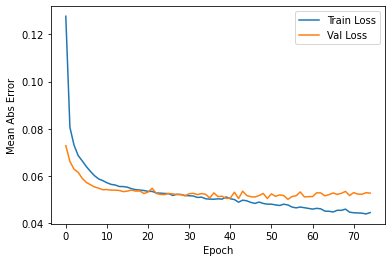

In [39]:

# Function to plot how the model is doing during training
def plot_history(history):
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error')
    plt.plot(history.epoch, np.array(history.history['loss']),
           label='Train Loss')
    plt.plot(history.epoch, np.array(history.history['val_loss']),
           label = 'Val Loss')
    plt.legend()
    #plt.ylim([0, 5])

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=20,verbose=True)

# Define basic architecture
model = keras.Sequential([
    keras.layers.LSTM(32, return_sequences=True, input_shape = (timestep,features*batch_size)),
    keras.layers.LSTM(32, return_sequences=True, input_shape = (timestep,features*batch_size)),
    keras.layers.LSTM(32, return_sequences=True, input_shape = (timestep,features*batch_size)),
    keras.layers.Dense(1)
])

optimizer = keras.optimizers.Adam(lr=0.001)
model.compile(loss='mse',optimizer=optimizer, metrics=['mae'])

history = model.fit(X_train,y_train,epochs=1000,verbose=2, validation_split=0.25,callbacks =[early_stop])

model.summary()
plot_history(history)

In [40]:
X_test.shape


(339, 5, 5)

In [41]:
y_test.shape


(339, 1)

## Evaluate on test data

In [42]:
[loss, mae] = model.evaluate(X_test, y_test, verbose=0)

In [51]:
print(mae)


0.19411081075668335


## Predict using data

In [44]:
test_predictions = model.predict(X_test)


tempT = []
averages = []
for x in range(len(test_predictions)):
    tempT = test_predictions[x]
    sum = 0
    for y in range(len(tempT)):
        sum = sum + (tempT[y])[0]
    avg = sum/len(tempT)
    averages.append(avg)
 

test_predictions = averages

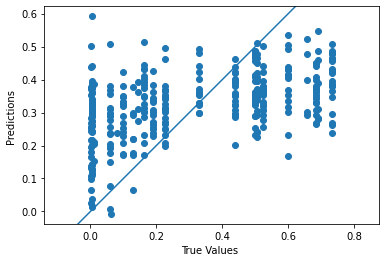

In [45]:
plt.scatter(y_test, test_predictions)
plt.xlabel('True Values ')
plt.ylabel('Predictions ')
plt.axis('equal')
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())
_ = plt.plot([-100, 100], [-100, 100])
plt.show()

In [47]:
from sklearn.metrics import r2_score
r2_score(y_test,test_predictions)

0.21629477795602658

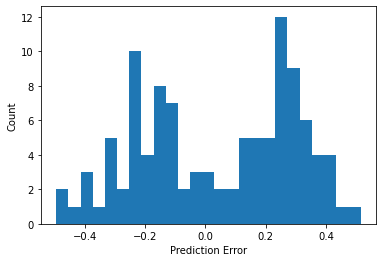

In [38]:

test_predictionsT = np.transpose(test_predictions)
test_predictions = pd.DataFrame(test_predictions,columns=['D2Area'])

errorlist = []
for x in range(len(test_predictions)):
    error = test_predictions - y_test

plt.hist(error, bins=25)

plt.xlabel("Prediction Error")
_ = plt.ylabel("Count")